In [1]:
#Importing libraries

import json
import os
import re

import pandas as pd

import matplotlib.pyplot as plt

# We bring the json back here from the data base and show what we want

In [2]:
# Function to find all the branches of the json
def find_branches(dictionary, depth, max_depth, parent_key=None):
    branches = []
    for key, value in dictionary.items():
        current_key = key if parent_key is None else f"{parent_key}\\{key}"  # Change '.' to '\\'
        if isinstance(value, dict) and depth < max_depth:
            branches.extend(find_branches(value, depth + 1, max_depth, current_key))
        else:
            branches.append(current_key)
    return branches


# Function to find the deepness of a dictionnary
def find_nested_depth(dictionary, current_depth=0):
    max_depth = current_depth
    for value in dictionary.values():
        if isinstance(value, dict):
            depth = find_nested_depth(value, current_depth + 1)
            max_depth = max(max_depth, depth)
    return max_depth

# json to table

In [3]:
#In this part we are extracting all the dataset from all the extractions we have done. These datasets are saved with there file names and request in order to combine them later
path_to_json = "scrapings/"
files_name = os.listdir(path_to_json)

dataframes = {}
requests_saved = []

for file in files_name:
    full_path = os.path.join(path_to_json, file)
    if os.path.isfile(full_path):
        with open(full_path, 'r') as myfile:
            datas = json.load(myfile)

            for data in datas:

                max_depth = find_nested_depth(data)
                all_branches = find_branches(data, 1, max_depth)
                for branches in all_branches:
                    req = "data"
                    title = str()
                    requests = str()
                    for branch in branches.split('\\'):
                        req += f"['{branch}']"
                        title += branch + ' '
                        requests += f"['{branch}']"
                    result = eval(req)
                    requests_saved.append(requests)
                    variable_name = f"df_{file}_{req}"
                    
                    dataframes[variable_name] = pd.DataFrame(result)
                    
requests_saved_cleaned = list(set(requests_saved))

In [4]:
def chain_to_list(chaine):
    return re.findall(r"\['(.*?)'\]", chaine)

In [13]:
def list_to_chain(liste):
    elements = [f"['{element}']" for element in liste]
    chain = ''.join(elements)
    return chain

['Linear Light Bulbs & Lamps']['LED Ballast-Bypass (UL Type B) Linear Lamps']['T8 Bulb Shape with Single Pin (Fa8) Base 8 ft Nominal Length']


Clés correspondantes au modèle regex :
df_2024-04-29_mon_fichier.json_data['Linear Light Bulbs & Lamps']['LED Ballast-Bypass (UL Type B) Linear Lamps']['T8 Bulb Shape with Single Pin (Fa8) Base 8 ft Nominal Length']
df_2024-05-24_mon_fichier.json_data['Linear Light Bulbs & Lamps']['LED Ballast-Bypass (UL Type B) Linear Lamps']['T8 Bulb Shape with Single Pin (Fa8) Base 8 ft Nominal Length']


,Color Temperature,Date,Light Output,Wattage,Wattage Equivalency,Voltage,Color Rendering Index,Dimmable,Shatter-Resistant,Bulb Housing,Brand,Price,Ref
7,3000K,2024-05-24,"4,000 lm",34 W,59 W,120 to 277 V AC,80,No,No,Glass,CURRENT,$47.81,0
8,3500K,2024-05-24,"4,000 lm",34 W,59 W,120 to 277 V AC,80,No,No,Glass,CURRENT,$47.81,1
9,4000K,2024-05-24,"4,400 lm",33 W,96 W,120 to 277V AC,80,Yes,No,Glass,PHILIPS,$42.01,2
0,4000K,2024-04-29,"4,400 lm",33 W,96 W,120 to 277V AC,80,Yes,No,Glass,PHILIPS,$45.82,2
10,4000K,2024-05-24,"4,400 lm",34 W,59 W,120 to 277 V AC,80,No,No,Glass,CURRENT,$47.81,3
1,4000K,2024-04-29,"5,400 lm",42 W,96 W,120 to 277V AC,80,Yes,No,Glass,PHILIPS,$44.88,4
11,4000K,2024-05-24,"5,400 lm",42 W,96 W,120 to 277V AC,80,Yes,No,Glass,PHILIPS,$40.96,4
2,4000K,2024-04-29,"5,500 lm",38 W,59 W,120 to 277V AC,80,No,Yes,Glass,MAXLITE,$42.87,5
12,4000K,2024-05-24,"5,500 lm",38 W,59 W,120 to 277V AC,80,No,Yes,Glass,MAXLITE,$42.04,5
13,5000K,2024-05-24,"4,400 lm",33 W,96 W,120 to 277V AC,80,Yes,No,Glass,PHILIPS,$41.78,6


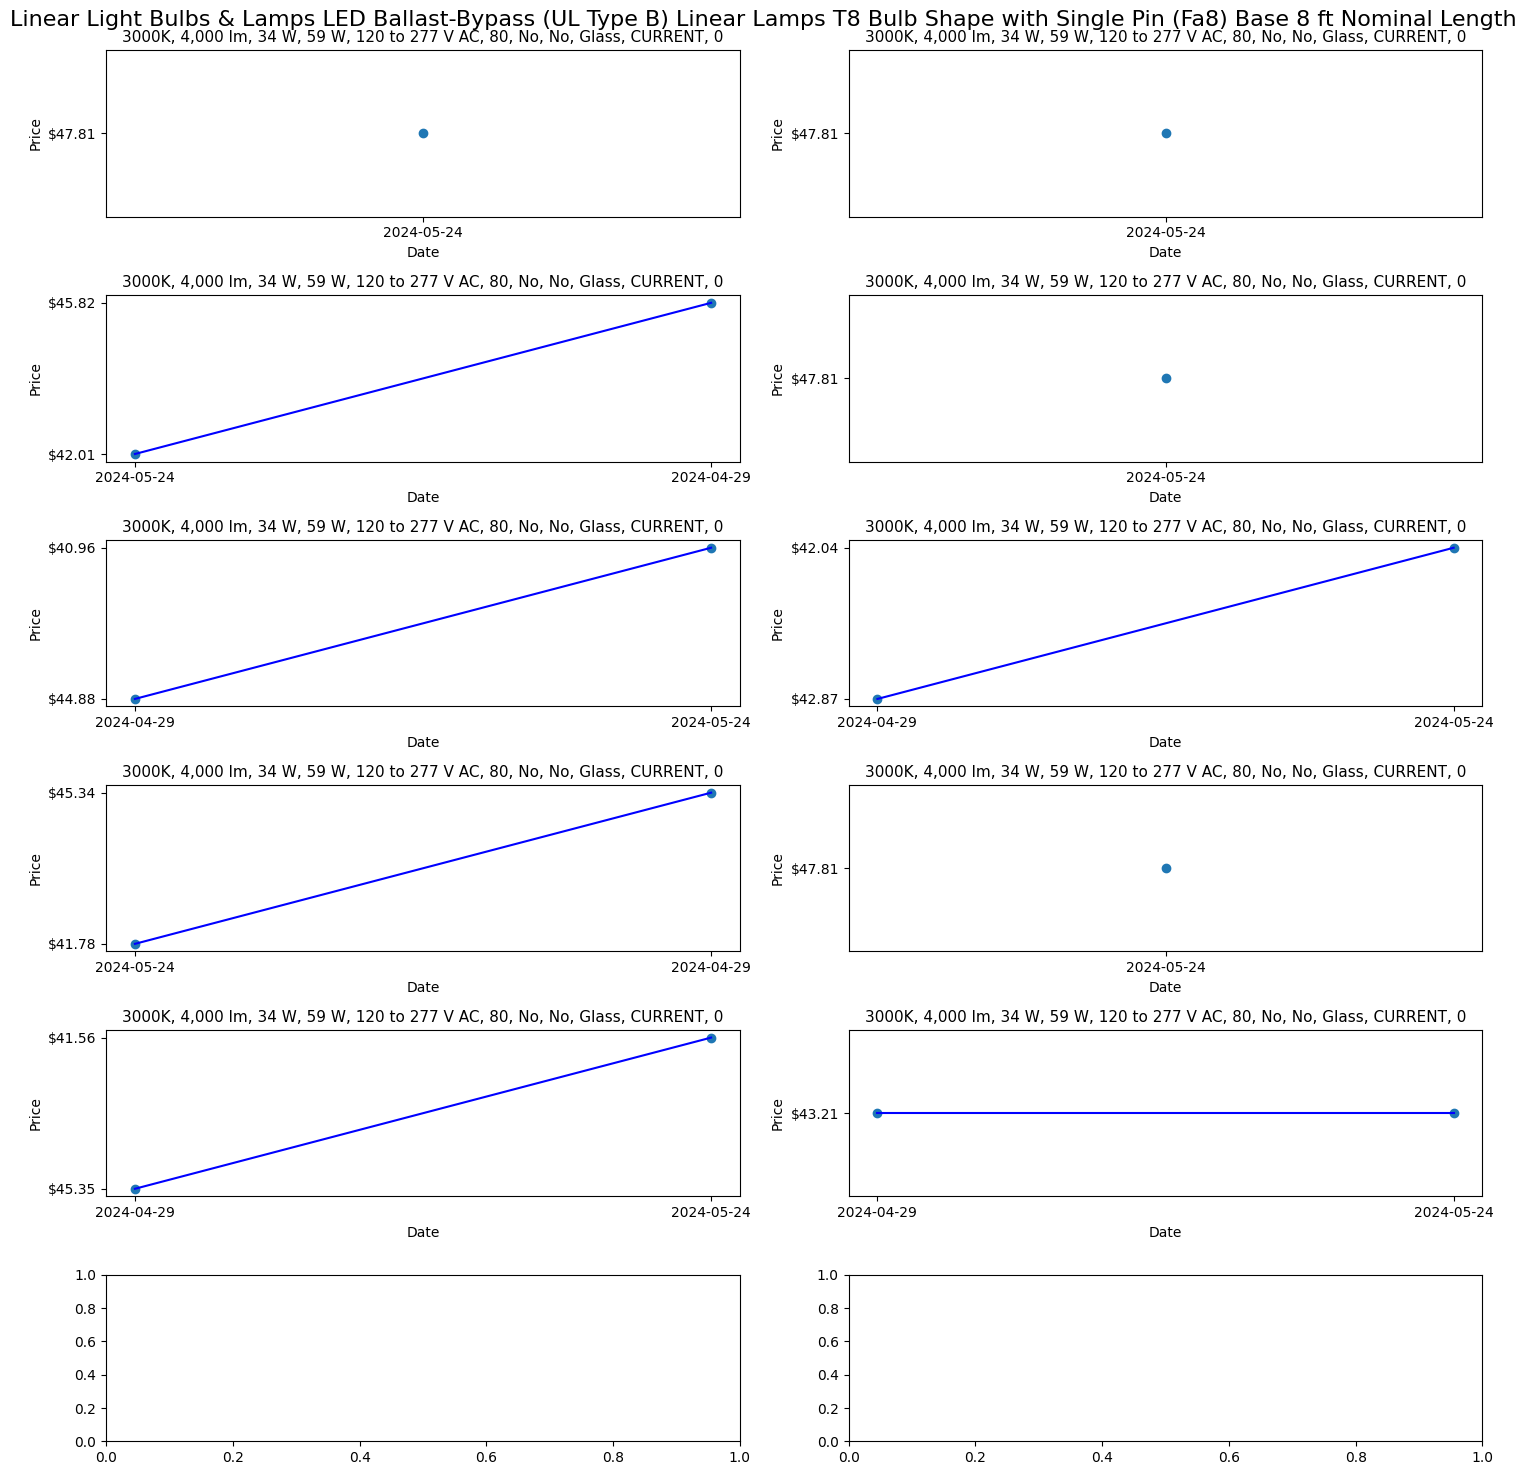

In [14]:
modele_regex = r"df_\d{4}-\d{2}-\d{2}_mon_fichier\.json_data" + re.escape(my_final_request_chain)

cles_trouvees = []

for cle in dataframes.keys():
    
    if re.match(modele_regex, cle):
        cles_trouvees.append(cle)

print("Clés correspondantes au modèle regex :")
dataframes_to_concat = []
for cle_trouvee in cles_trouvees:
    print(cle_trouvee)
    dataframes_to_concat.append(dataframes[cle_trouvee])

df_concatene = pd.concat(dataframes_to_concat, ignore_index=True)

#In order to thing the same items, I attribute them a Ref number. If the items is the same, everything but price and date has to be the same
colonnes_a_exclure = ['Date', 'Price']

df_concatene['Ref'] = df_concatene.groupby([colonne for colonne in df_concatene.columns if colonne not in colonnes_a_exclure]).ngroup()
df_concatene.sort_values(by=['Ref'], inplace=True)

display(df_concatene)

fig, axes = plt.subplots(nrows=(max(df_concatene['Ref']) // 2) + 1, ncols=2, figsize=(15, 15))
fig.suptitle(my_final_request_chain.replace("[", "").replace("]", "").replace("''", " ").replace("'", ""), fontsize=16)
for i, ax in enumerate(axes.flat):
    if i < max(df_concatene['Ref']):
        df = df_concatene[df_concatene['Ref'] == i]
        ax.plot(df['Date'], df['Price'], color='blue', linestyle='-')  
        ax.scatter(x=df['Date'], y=df['Price'])
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        
        first_row_values = df_concatene.drop(columns=['Date', 'Price']).iloc[0].values
        string_first_row = ', '.join(map(str, first_row_values))
        ax.set_title(string_first_row, fontsize = 11)

plt.tight_layout()

plt.show()